## Bank Term Deposit Acceptance forecasting

Obiettivo di questo assignment è la valutazione delle competenze tecniche del candidato e la sua modalità di approccio ad un problema di Data Science. Nello specifico è richiesto di sviluppare un modello predittivo in grado di indicare se un cliente intercettato da una campagna di marketing da parte di una banca decide di sottoscrivere o meno un deposito bancario a termine (bank term deposit).

#### Dataset: ####

All'interno della cartella **data**  viene fornito il file **bank-dataset.csv** che contiene le campagne marketing telefoniche effettuate da una banca per proporre l'acquisto del prodotto bancario.
I dettagli del dataset sono forniti all'interno del file: **bank-names.txt**.
La variabile target che indica se il cliente accetta o meno la sottoscrizione del deposito bancario è contenuta nel medesimo file con field name "y".

#### Assignment: ####

Richiesta di questo assignment è la costruzione di un modello predittivo con performance soddisfacenti per il candidato dando evidenza di tutti gli step tipici che dovrebbero essere affrontati in un progetto di Data Science: dalla pulizia e preparazione del dato fino al testing delle performance del modello costruito.

Il notebook svolto dovrà essere opportunamente commentato e dovrà essere consegnato tramite condivisione di un repository github personale accessibile che ne permetta la riproduzione.

In [ ]:
pip install -U ydata-profiling

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('bank-dataset.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43092,25.0,technician,single,secondary,no,505,no,yes,cellular,17,nov,386.0,2,-1,0,unknown,yes
43093,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977.0,3,-1,0,unknown,yes
43094,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456.0,2,-1,0,unknown,yes
43095,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508.0,4,-1,0,unknown,no


In [4]:
profile = ProfileReport(df, title="Profiling Report")

In [5]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Pulizia e preparazione dato

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43074 non-null  float64
 1   job        43097 non-null  object 
 2   marital    43097 non-null  object 
 3   education  43097 non-null  object 
 4   default    43097 non-null  object 
 5   balance    43097 non-null  int64  
 6   housing    43097 non-null  object 
 7   loan       43097 non-null  object 
 8   contact    43039 non-null  object 
 9   day        43097 non-null  int64  
 10  month      43097 non-null  object 
 11  duration   43021 non-null  float64
 12  campaign   43097 non-null  int64  
 13  pdays      43097 non-null  int64  
 14  previous   43097 non-null  int64  
 15  poutcome   43087 non-null  object 
 16  y          43097 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.6+ MB


In [7]:
#eliminare righe con valori nulli
df.dropna(inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43092,25.0,technician,single,secondary,no,505,no,yes,cellular,17,nov,386.0,2,-1,0,unknown,yes
43093,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977.0,3,-1,0,unknown,yes
43094,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456.0,2,-1,0,unknown,yes
43095,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508.0,4,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['age'] = df['age'].astype(int)
df['duration'] = df['duration'].astype(int)

In [10]:
#eliminare righe duplicate
print(df[df.duplicated()])
df.drop_duplicates(inplace=True)

       age            job marital  education default  balance housing loan  \
30630   28        student  single  secondary      no     5916      no   no   
30631   28        student  single  secondary      no     5916      no   no   
30632   28        student  single  secondary      no     5916      no   no   
30633   28        student  single  secondary      no     5916      no   no   
30634   28        student  single  secondary      no     5916      no   no   
30635   28        student  single  secondary      no     5916      no   no   
41934   25  self-employed  single    unknown      no     1179      no   no   
41935   25  self-employed  single    unknown      no     1179      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
30630  cellular   20   mar        93         5     -1         0  unknown  no  
30631  cellular   20   mar        93         5     -1         0  unknown  no  
30632  cellular   20   mar        93         5     -1       

In [11]:
df[df['balance']==5916]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30629,28,student,single,secondary,no,5916,no,no,cellular,20,mar,93,5,-1,0,unknown,no
38293,28,student,single,secondary,no,5916,no,no,cellular,22,may,259,1,63,5,failure,no
39520,28,student,single,secondary,no,5916,no,no,cellular,11,aug,344,1,81,6,failure,no


In [12]:
#in marital riunire i single e i divorced con una unica label
df['marital'].replace('Singl','single', inplace=True)
df['marital'].replace('Single','single', inplace=True)
df['marital'].replace('divrcd','divorced', inplace=True)

In [13]:
#eliminare righe con valore dell'età 150 
indexNames = df[df['age'] == 150].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [14]:
#eliminare righe con valore day 99 
indexNames = df[df['day'] == 99].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [15]:
#eliminare righe con valore S in merital 
indexNames = df[df['marital'] == 'S'].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [16]:
#pdays è correlata con altre feature
df.drop(['pdays'], axis = 1, inplace=True) 

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43092,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,0,unknown,yes
43093,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes
43094,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
43095,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no


In [18]:
profile_pre = ProfileReport(df, title="Profiling Report")

In [19]:
profile_pre.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install imblearn

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
def plot_y(y):
    values = y.value_counts()
    names= ['no', 'yes']
    print(values)
    fig, ax = plt.subplots()
    bar_container = ax.bar(names, values, color=["red", "lightgreen"])
    ax.set(ylabel='count', title='client subscribed')
    ax.bar_label(bar_container)

In [22]:
df['default'] = df.default.map(dict(yes=1, no=0))
df['housing'] = df.housing.map(dict(yes=1, no=0))
df['loan'] = df.loan.map(dict(yes=1, no=0))

In [25]:
df2 = df

label_encoder = LabelEncoder()
df2['marital'] = label_encoder.fit_transform(df2['marital'])
set(df2['marital'])

{0, 1, 2}

In [26]:
df2['education'] = label_encoder.fit_transform(df2['education'])
df2['job'] = label_encoder.fit_transform(df2['job'])
df2['contact'] = label_encoder.fit_transform(df2['contact'])
df2['month'] = label_encoder.fit_transform(df2['month'])
df2['poutcome'] = label_encoder.fit_transform(df2['poutcome'])

In [27]:
x = df2.drop("y", axis=1)
y = df2["y"]

x_train_trans, x_val_trans, y_train_trans, y_val_trans = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=22)
x_train_trans

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
5984,46,9,0,1,0,1,1,1,2,26,8,200,3,0,3
20616,30,7,2,2,0,719,0,1,0,14,1,38,2,0,3
10166,53,6,1,2,0,4397,1,0,2,12,6,252,1,0,3
22199,46,9,1,1,0,520,0,0,0,25,1,61,4,0,3
14903,51,1,1,0,0,201,1,0,0,17,5,582,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,30,1,1,1,0,2583,1,0,0,14,8,436,3,0,3
9636,58,5,1,1,0,630,0,0,2,9,6,443,2,0,3
11017,60,3,1,0,0,0,0,0,2,18,6,138,1,0,3
11036,58,3,0,0,0,0,0,0,2,18,6,290,2,0,3


no     27712
yes     2187
Name: y, dtype: int64


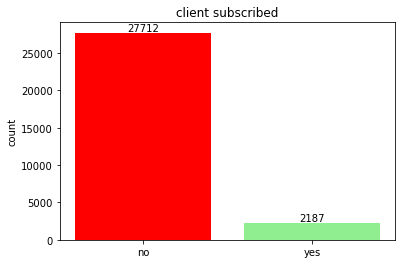

In [28]:
plot_y(y_train_trans)

In [29]:
sm = SMOTE(random_state=22)
x_train_over, y_train_over = sm.fit_resample(x_train_trans, y_train_trans)

no     27712
yes    27712
Name: y, dtype: int64


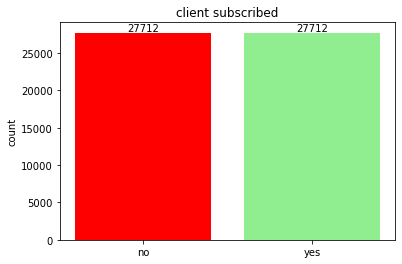

In [30]:
plot_y(y_train_over)

In [31]:
rus = RandomUnderSampler(random_state=42)
x_train_down, y_train_down = rus.fit_resample(x_train_trans, y_train_trans)

no     2187
yes    2187
Name: y, dtype: int64


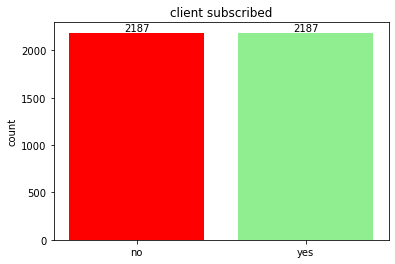

In [32]:
plot_y(y_train_down)

In [33]:
sme = SMOTEENN(random_state=22)
x_train_union, y_train_union = sme.fit_resample(x_train_trans, y_train_trans)

yes    24677
no     19480
Name: y, dtype: int64


[Text(0, 0, '24677'), Text(0, 0, '19480')]

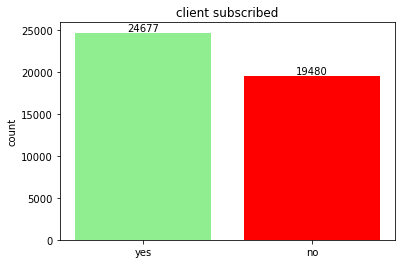

In [34]:
values = y_train_union.value_counts()
names= ['yes', 'no']
print(values)
fig, ax = plt.subplots()
bar_container = ax.bar(names, values, color=["lightgreen", "red"])
ax.set(ylabel='count', title='client subscribed')
ax.bar_label(bar_container)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [36]:
def eval_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Purples_r')
    plt.show()
    acc = model.score(x_test,y_test)
    prec = precision_score(y_test, y_pred, average="binary", pos_label="yes")
    rec = recall_score(y_test, y_pred, average="binary", pos_label="yes")
    print('accuracy:', acc, '\nprecision:', prec, '\nrecall:', rec)
    return [acc, prec, rec]

### Modelli passando over

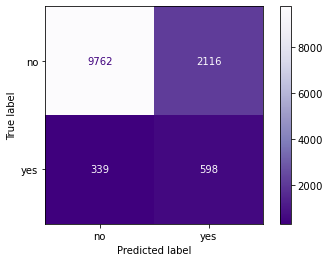

accuracy: 0.8084276238782676 
precision: 0.22033898305084745 
recall: 0.6382070437566703


In [37]:
res_ridge_over = eval_model(RidgeClassifier(random_state=1), x_train_over, y_train_over, x_val_trans, y_val_trans)

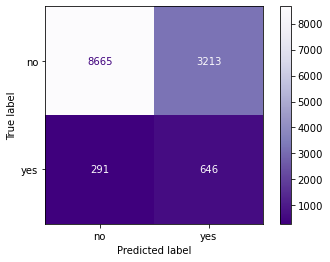

accuracy: 0.7265704252828716 
precision: 0.16740088105726872 
recall: 0.6894343649946638


In [38]:
res_k_over = eval_model(KNeighborsClassifier(n_neighbors=50), x_train_over, y_train_over, x_val_trans, y_val_trans)

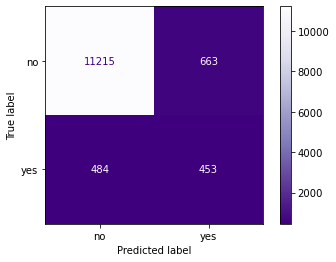

accuracy: 0.9104955130706204 
precision: 0.40591397849462363 
recall: 0.4834578441835646


In [39]:
res_rf_over = eval_model(RandomForestClassifier(random_state=22, max_depth=30), x_train_over, y_train_over, x_val_trans, y_val_trans)

### Modelli passando under

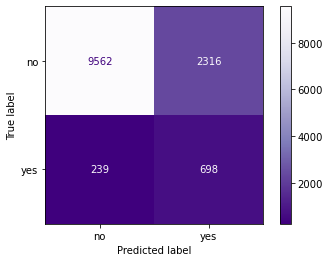

accuracy: 0.8006242684354272 
precision: 0.23158593231585933 
recall: 0.7449306296691569


In [40]:
res_ridge_under = eval_model(RidgeClassifier(random_state=1), x_train_down, y_train_down, x_val_trans, y_val_trans)

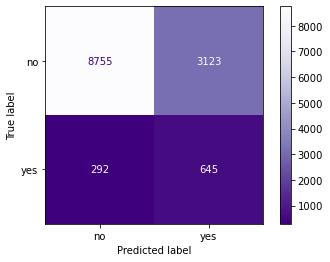

accuracy: 0.7335154116269996 
precision: 0.17117834394904458 
recall: 0.688367129135539


In [41]:
res_k_under = eval_model(KNeighborsClassifier(n_neighbors=50), x_train_down, y_train_down, x_val_trans, y_val_trans)

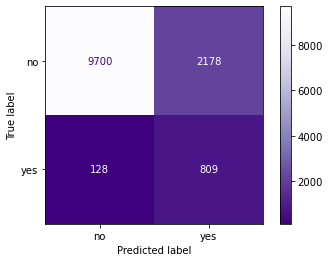

accuracy: 0.8200546234880999 
precision: 0.2708403080013391 
recall: 0.8633938100320171


In [42]:
res_rf_under = eval_model(RandomForestClassifier(random_state=22, max_depth=30), x_train_down, y_train_down, x_val_trans, y_val_trans)

### Modelli passando SMOTEEN

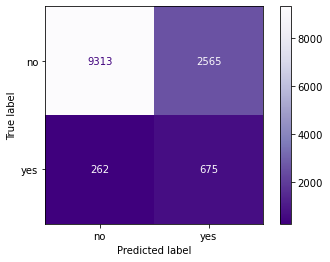

accuracy: 0.7793991416309013 
precision: 0.20833333333333334 
recall: 0.7203842049092849


In [43]:
res_ridge_union = eval_model(RidgeClassifier(random_state=1), x_train_union, y_train_union, x_val_trans, y_val_trans)

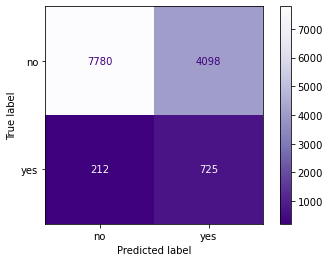

accuracy: 0.6636753804135779 
precision: 0.15032137673647109 
recall: 0.7737459978655283


In [44]:
res_k_union = eval_model(KNeighborsClassifier(n_neighbors=50), x_train_union, y_train_union, x_val_trans, y_val_trans)

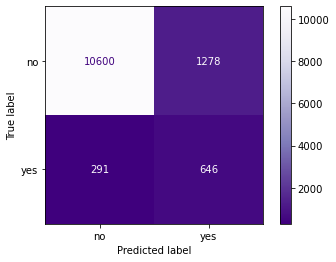

accuracy: 0.8775653531018338 
precision: 0.33575883575883575 
recall: 0.6894343649946638


In [45]:
res_rf_union = eval_model(RandomForestClassifier(random_state=22, max_depth=30), x_train_union, y_train_union, x_val_trans, y_val_trans)

In [46]:
val = list([res_k_over[0],res_k_over[1],res_k_over[2],'KNN','Oversampling',
            res_k_under[0], res_k_under[1],res_k_under[2],'KNN','Undersampling',
            res_k_union[0], res_k_union[1], res_k_union[2], 'KNN', 'SMOTEEN'])
df_res_k = pd.DataFrame ([val[0:5], val[5:10], val[10:15]], columns = ['Accuracy','Precision','Recall','Model','Sampling'])
df_res_k

,Accuracy,Precision,Recall,Model,Sampling
0,0.726570,0.167401,0.689434,KNN,Oversampling
1,0.733515,0.171178,0.688367,KNN,Undersampling
2,0.663675,0.150321,0.773746,KNN,SMOTEEN


In [47]:
val = list([res_rf_over[0],res_rf_over[1],res_rf_over[2],'Random Forest','Oversampling',
            res_rf_under[0], res_rf_under[1],res_rf_under[2],'Random Forest','Undersampling',
            res_rf_union[0], res_rf_union[1], res_rf_union[2], 'Random Forest', 'SMOTEEN'])
df_res_rf = pd.DataFrame ([val[0:5], val[5:10], val[10:15]], columns = ['Accuracy','Precision','Recall','Model','Sampling'])
df_res_rf

,Accuracy,Precision,Recall,Model,Sampling
0,0.910496,0.405914,0.483458,Random Forest,Oversampling
1,0.820055,0.270840,0.863394,Random Forest,Undersampling
2,0.877565,0.335759,0.689434,Random Forest,SMOTEEN


In [48]:
val = list([res_ridge_over[0],res_ridge_over[1],res_ridge_over[2],'Ridge','Oversampling',
            res_ridge_under[0], res_ridge_under[1],res_ridge_under[2],'Ridge','Undersampling',
            res_ridge_union[0], res_ridge_union[1], res_ridge_union[2], 'Ridge', 'SMOTEEN'])
df_res_ridge = pd.DataFrame ([val[0:5], val[5:10], val[10:15]], columns = ['Accuracy','Precision','Recall','Model','Sampling'])
df_res_ridge

,Accuracy,Precision,Recall,Model,Sampling
0,0.808428,0.220339,0.638207,Ridge,Oversampling
1,0.800624,0.231586,0.744931,Ridge,Undersampling
2,0.779399,0.208333,0.720384,Ridge,SMOTEEN


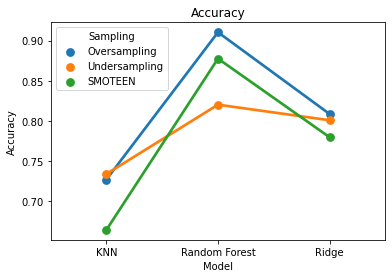

In [49]:
df_finale = pd.concat([df_res_k, df_res_rf, df_res_ridge])
ax = sns.pointplot(data=df_finale, x="Model", y="Accuracy", hue='Sampling', kind="point")
plt.title("Accuracy")
plt.show()

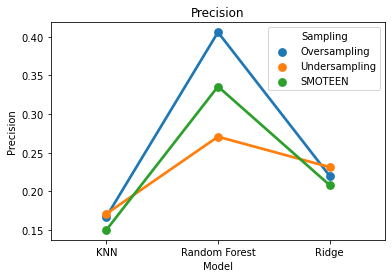

In [50]:
ax = sns.pointplot(data=df_finale, x="Model", y="Precision", hue='Sampling', kind="point")
plt.title("Precision")
plt.show()

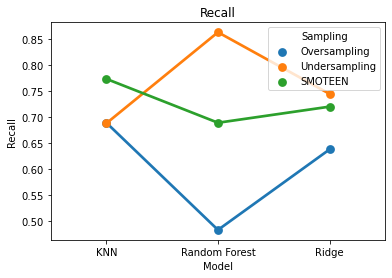

In [51]:
ax = sns.pointplot(data=df_finale, x="Model", y="Recall", hue='Sampling', kind="point")
plt.title("Recall")
plt.show()

In [ ]:
# dei modelli utilizzati sembra performare meglio il Random Forest e il peggiore è la Ridge.
# Come metodo per il sampling ottiene dei risultati migliori l'oversampling, anche rispetto alla tecnica più avanzata smoteen.
# In generale al crescere della precision cala la recall, quindi bisogna scegliere un modello che trovi il giusto equilibrio.
# Questo potrebbe essere il Random forest usando la tecnica SMOTEEN, poichè ha il secondo valore più alto di Precision 
# perdendo poco in Recall, mentre usando l'oversampling (miglior valore di precision) c'è un netto peggioramento nella recall.